In [ ]:
import pandas as pd

In [ ]:
titanic = pd.read_csv("train.csv")
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
titanic.shape


(891, 12)

In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
pd.crosstab(titanic['Sex'], titanic['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


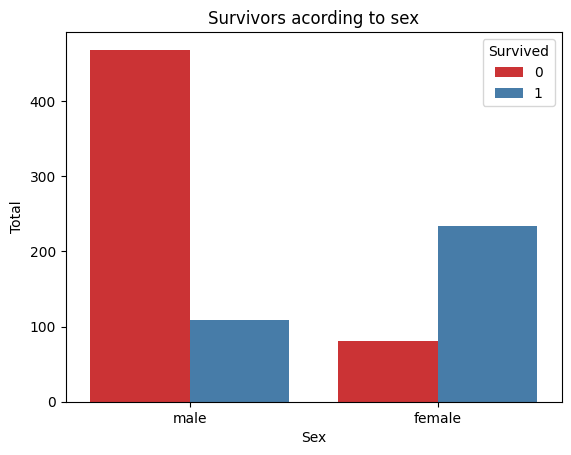

In [ ]:
# plot the above information

ax = sns.countplot(x = "Sex", hue = "Survived", palette = "Set1", data = titanic )
ax.set(title = "Survivors acording to sex", xlabel = "Sex",ylabel = "Total")
plt.show()


Dependent and Independent Variable

*   Dependent : What is the thing that we are testing ? -- Survived
*   Independent : the variable that affect the dependent variable ---- (Age,Class,Sex)




# Correctinng the  **Data**

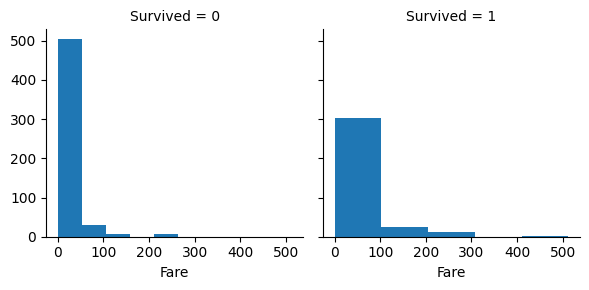

In [ ]:
graph = sns.FacetGrid(titanic, col = "Survived")
graph.map(plt.hist, "Fare", bins = 5)

In [ ]:
titanic.loc[titanic["Fare"] >400, "Fare"] = titanic["Fare"].median()

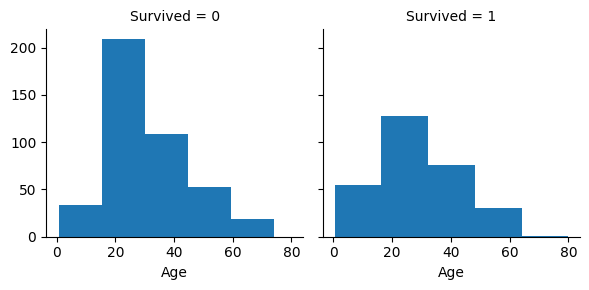

In [ ]:
graph_age = sns.FacetGrid(titanic, col = "Survived")
graph_age.map(plt.hist, "Age", bins = 5)

## Data Completing

In [ ]:
for column in titanic :
  print(column , ":", titanic[column].isnull().sum())

PassengerId : 0
Survived : 0
Pclass : 0
Name : 0
Sex : 0
Age : 177
SibSp : 0
Parch : 0
Ticket : 0
Fare : 0
Cabin : 687
Embarked : 2


In [ ]:
titanic["Age"].fillna(titanic["Age"].median(), inplace = True)

In [ ]:
embark_count = titanic['Embarked'].value_counts()
embark_count

#Embarked implies where the traveler mounted from. There are three possible values for Embark — Southampton,
# Cherbourg, and Queenstown. More than 70% of the people boarded from Southampton.

S    644
C    168
Q     77
Name: Embarked, dtype: int64

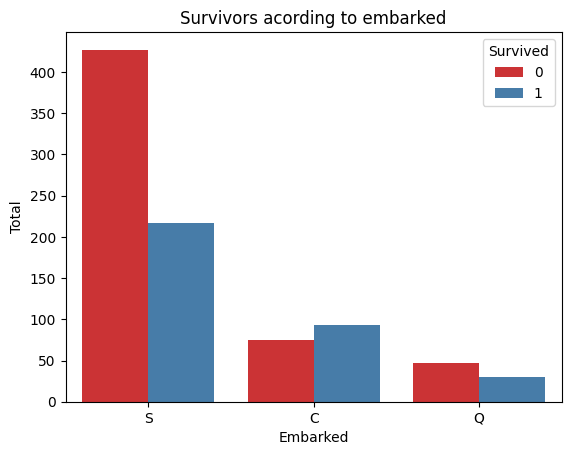

In [ ]:
ax = sns.countplot(x = "Embarked", hue = "Survived", palette = "Set1", data = titanic )
ax.set(title = "Survivors acording to embarked", xlabel = "Embarked",ylabel = "Total")
plt.show()

In [ ]:
titanic["Embarked"].fillna("S", inplace = True)

In [ ]:
del titanic["Cabin"]

In [ ]:
for column in titanic :
  print(column , ":", titanic[column].isnull().sum())

PassengerId : 0
Survived : 0
Pclass : 0
Name : 0
Sex : 0
Age : 0
SibSp : 0
Parch : 0
Ticket : 0
Fare : 0
Embarked : 0


In [ ]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [ ]:
titanic['Embarked'].value_counts()


0    646
1    168
2     77
Name: Embarked, dtype: int64

## Data Creating (Feature Engineering)

In [ ]:
titanic["Name"].sample(20)

100                              Petranec, Miss. Matilda
38                    Vander Planke, Miss. Augusta Maria
527                                   Farthing, Mr. John
531                                    Toufik, Mr. Nakli
546                    Beane, Mrs. Edward (Ethel Clarke)
759    Rothes, the Countess. of (Lucy Noel Martha Dye...
588                                Gilinski, Mr. Eliezer
201                                  Sage, Mr. Frederick
583                                  Ross, Mr. John Hugo
277                          Parkes, Mr. Francis "Frank"
791                                  Gaskell, Mr. Alfred
603                            Torber, Mr. Ernst William
354                                    Yousif, Mr. Wazli
799    Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...
574                         Rush, Mr. Alfred George John
809       Chambers, Mrs. Norman Campbell (Bertha Griggs)
477                            Braund, Mr. Lewis Richard
522                            

In [ ]:
def get_title(name):
  if '.' in name:
    return name.split(',')[1].split('.')[0].strip()
  else :
    return "None"

In [ ]:
titles = set([x for x in titanic.Name.map(lambda x : get_title(x))])
titles

{'Capt',
 'Col',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [ ]:
def shorter_title(x):
  title = x["Title"]
  if title in ['Capt', 'Col', 'Major']:
    return "Officer"
  elif title in ['Jonkheer', 'Don', 'the Countess', 'Dona', 'Lady', 'Sir']:
    return "Royalty"
  elif title == "Mme":
    return "Mrs"
  elif title in ['Mlle', 'Ms']:
    return "Miss"
  else:
    return title



In [ ]:
titanic["Title"] = titanic["Name"].map(lambda x : get_title(x))
titanic["Title"]

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [ ]:
titanic["Title"] = titanic.apply(shorter_title, axis = 1)
titanic["Title"].value_counts()

Mr         517
Miss       185
Mrs        126
Master      40
Dr           7
Rev          6
Royalty      5
Officer      5
Name: Title, dtype: int64

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [ ]:
titanic.drop("Name", axis = 1, inplace = True)


In [ ]:
titanic.sample(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
42,43,0,3,male,28.0,0,0,349253,7.8958,C,Mr
75,76,0,3,male,25.0,0,0,348123,7.6500,S,Mr
634,635,0,3,female,9.0,3,2,347088,27.9000,S,Miss
694,695,0,1,male,60.0,0,0,113800,26.5500,S,Officer
810,811,0,3,male,26.0,0,0,3474,7.8875,S,Mr
832,833,0,3,male,28.0,0,0,2671,7.2292,C,Mr
258,259,1,1,female,35.0,0,0,PC 17755,14.4542,C,Miss
568,569,0,3,male,28.0,0,0,2686,7.2292,C,Mr
564,565,0,3,female,28.0,0,0,SOTON/O.Q. 392087,8.0500,S,Miss
826,827,0,3,male,28.0,0,0,1601,56.4958,S,Mr


In [ ]:
titanic.drop("Ticket", axis = 1, inplace = True)

## Data Converting

In [ ]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
Title           object
dtype: object

In [ ]:
titanic.Sex.replace(('male', 'female'), (0,1), inplace = True)
titanic.Embarked.replace(('S','C', 'Q'), (0,1,2), inplace = True)


In [ ]:
titanic.Title.replace(('Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev', 'Officer', 'Royalty'), (0,1,2,3,4,5,6,7), inplace = True)

# Train and Test the Data set

In [ ]:
titanic.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,0,0
1,2,1,1,1,38.0,1,0,71.2833,1,2
2,3,1,3,1,26.0,0,0,7.9250,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,2
4,5,0,3,0,35.0,0,0,8.0500,0,0


In [ ]:
y = titanic['Survived']

In [ ]:
x = titanic.drop(['Survived', 'PassengerId'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split( x, y, test_size = 0.10, random_state = 42 )

In [ ]:
import pickle

from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [ ]:
decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)

acc_decisiontree = round(accuracy_score(y_pred, y_val)*100, 2)
pickle.dump(decisiontree, open("titanic_model.sav", "wb"))
print(acc_decisiontree)



81.11


In [ ]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83        54
           1       0.72      0.86      0.78        36

    accuracy                           0.81        90
   macro avg       0.81      0.82      0.81        90
weighted avg       0.82      0.81      0.81        90



In [ ]:
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0)

score = cross_val_score(decisiontree, x, y, cv = k_fold, n_jobs = 1, scoring = "accuracy" )
print(score)

[0.73333333 0.74157303 0.7752809  0.79775281 0.82022472 0.80898876
 0.7752809  0.7752809  0.74157303 0.83146067]


In [ ]:
print("K-Fold cross value accuracy -->",round(sum(score)/len(score)*100, 2) )

K-Fold cross value accuracy --> 78.01


In [ ]:
dftest = pd.read_csv("test.csv")

In [ ]:
dftest['Title'] = dftest['Name'].map(lambda x : get_title(x))
dftest['Title'] = dftest.apply(shorter_title, axis = 1)
ids = dftest['PassengerId']

dftest['Age'].fillna(dftest['Age'].median(), inplace = True)
dftest['Fare'].fillna(dftest['Fare'].median(), inplace = True)
dftest['Embarked'].fillna("S",inplace = True)

dftest.drop("Cabin", axis = 1, inplace = True)
dftest.drop("Ticket", axis = 1, inplace = True)
dftest.drop("Name",  axis = 1, inplace = True)
dftest.drop("PassengerId", axis = 1,  inplace = True)
dftest.Sex.replace(('male', 'female'), (0,1), inplace = True)
dftest.Embarked.replace(("S", "C", "Q"), (0,1,2), inplace = True)
dftest.Title.replace(("Mr", "Miss", "Mrs", "Master", "Dr", "Rev", "Officer", "Royalty"), (0,1,2,3,4,5,6,7), inplace =True)


In [ ]:
dftest.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,34.5,0,0,7.8292,2,0
1,3,1,47.0,1,0,7.0000,0,2
2,2,0,62.0,0,0,9.6875,2,0
3,3,0,27.0,0,0,8.6625,0,0
4,3,1,22.0,1,1,12.2875,0,2


In [ ]:
predictions = decisiontree.predict(dftest)
output = pd.DataFrame({"PassengerId":ids, "Survived":predictions})
output.to_csv("prediction try01.csv", index = False)


In [ ]:
# Correct order in the dataframe

def prediction_model(pclass, sex, age, sibsp, parch, fare, embarked, title):
  import pickle
  x = [[pclass, sex, age, sibsp, parch, fare, embarked, title]]
  decisiontree = pickle.load(open('titanic_model.sav', 'rb'))
  prediction = decisiontree.predict(x)
  return prediction